In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from scipy.optimize import curve_fit
from scipy import stats
from sklearn.linear_model import LinearRegression 

plt.rcParams.update({'font.size': 12})

In [3]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return m/sd

In [18]:
path = os.getcwd()
print(path) 

#file_list contem somente os dados com resposta de frequencia
file_list = sorted(glob.glob('*amostra*.txt'))
print(file_list)

i = 0
# lendo o data frame na file_list
# df = pd.read_table(file_list[i], header = 17, decimal=",")

nomes = ['Estanho', 'Cobre', 'Magnésio','Molibdênio', 'Silício', 'Grafite', 'vidro1', 'vidro']
amostras = len(nomes)
df = [pd.read_table(file_list[i], header = 17, decimal=",") for i in range(amostras)]


# ajeitando os dados
for i in range(amostras):
    df[i].rename(columns = {list(df[i])[0]: 'angulo'}, inplace = True)
    df[i].rename(columns = {list(df[i])[1]: 'intensidade'}, inplace = True)
    df[i] = df[i][:-1]
    df[i]['angulo'] = [x.replace(',', '.') for x in df[i]['angulo']]
    df[i]['angulo'] = df[i]['angulo'].astype(float)
    
# df.rename(columns = {list(df)[0]: 'angulo'}, inplace = True)
# df.rename(columns = {list(df)[1]: 'intensidade'}, inplace = True)
# df = df[:-1]
# df['angulo'] = [x.replace(',', '.') for x in df['angulo']]
# df['angulo'] = df['angulo'].astype(float)    

# Concatenando as duas medidas do vidro para fazer um gráfico só
df[amostras-1] = pd.concat([df[amostras-2][:999], df[amostras-1]], axis=0)
df[amostras-1] = df[amostras-1][:4000]

df[amostras-3]

C:\Users\Arthur\Documents\000 UNICAMP\F740\exp2\notebook
['amostra10_30-120_002_17_26-04-22_22-57.TXT', 'amostra1_20-100_002_25_19-04-22_21-30.TXT', 'amostra2_20-120_002_17_03-05-22_22-07.TXT', 'amostra6_30-120_002_17_26-04-22_21-46.TXT', 'amostra7_20-110_002_25_19-04-22_22-26.TXT', 'amostra_c_20-120_002_17_03-05-22_20-18.TXT', 'amostra_vidro2_00-30_002_17_03-05-22_22-29.TXT', 'amostra_vidro_20-80_002_17_03-05-22_21-00.TXT']


,angulo,intensidade
0,20.04,79
1,20.06,84
2,20.08,77
3,20.10,93
4,20.12,80
...,...,...
4993,119.90,40
4994,119.92,29
4995,119.94,37
4996,119.96,35


In [19]:
print(signaltonoise(df[0]['intensidade']))

1.208741827119774


In [20]:
""" Função geral para plotar os espectros de cada amostra,
    com opção de plotar média móvel """

def plot_spectro(df, color, name, xlim=(0,100), ylim=(0,100), window_size = 0):
    
    plt.figure(figsize=(10,5))
    if window_size:
        plt.plot(df['angulo'], df['intensidade'].rolling(window_size).mean(), alpha=0.7, color = 'red', label='Média movel')
    else:
        plt.plot(df['angulo'], df['intensidade'], alpha=0.7, color = 'dodgerblue', label='Dados coletados')

    plt.grid(True, alpha = 0.7)

    plt.xlabel(r'Ângulo de medida ($2 \theta$)', size=14)
    plt.ylabel('Intensidade (contagens)', size=14)
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.title('Intensidade dos raios-x refletidos de uma amostra de {}\n'
              'em função do ângulo de medida'.format(name),
              size=16)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(loc='upper left')


    plt.tight_layout()
    plt.savefig('spectro_{}.pdf'.format(name))

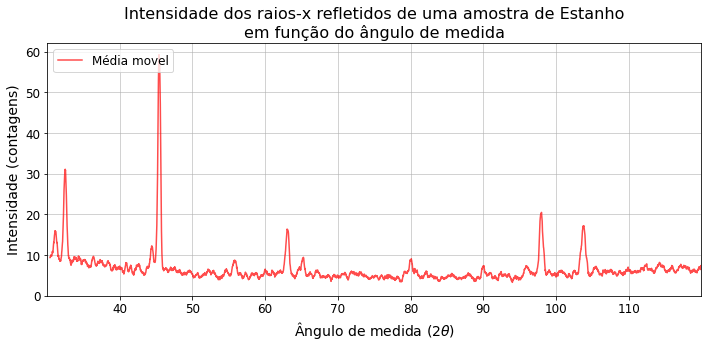

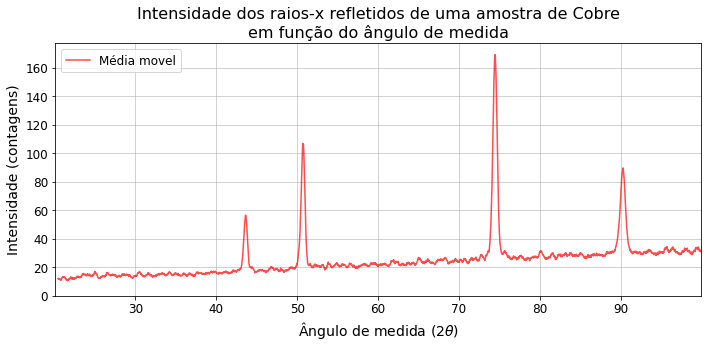

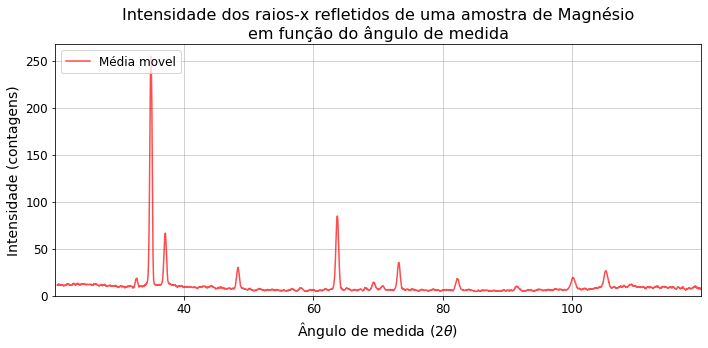

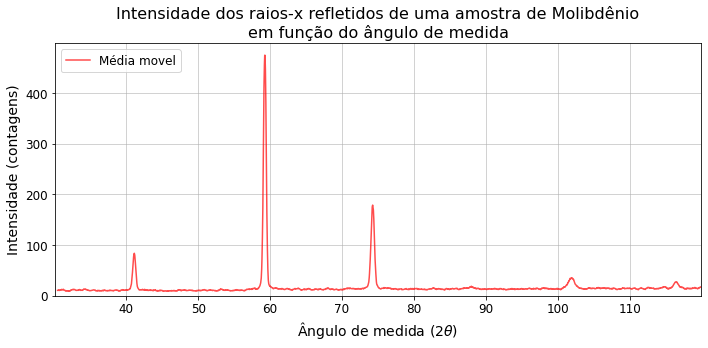

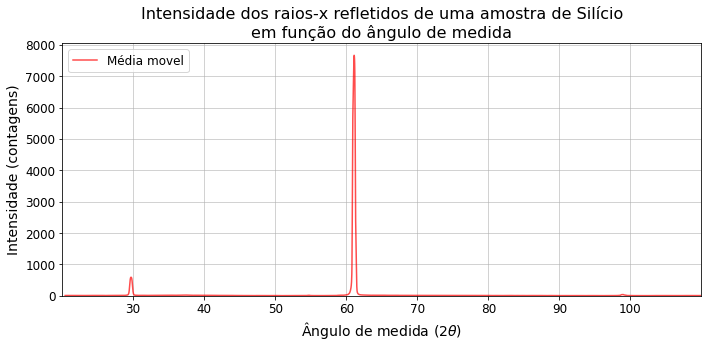

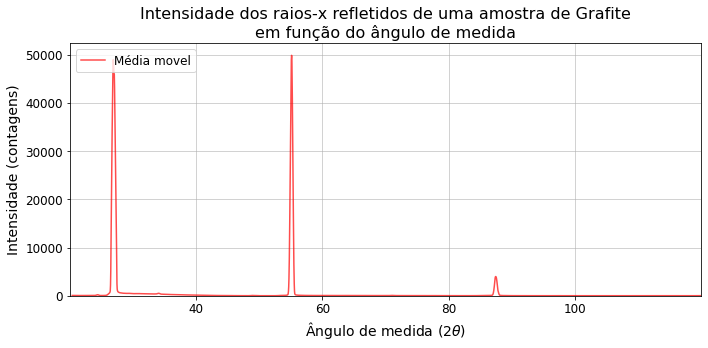

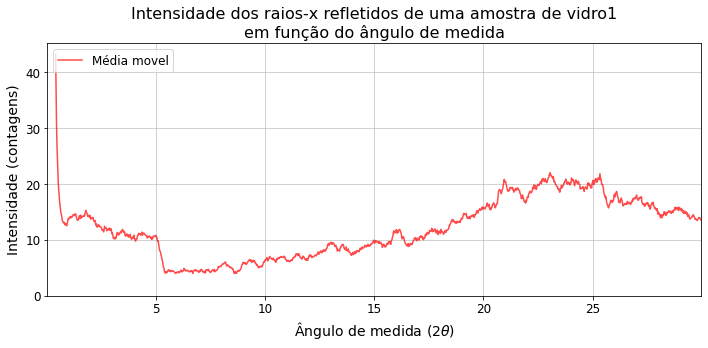

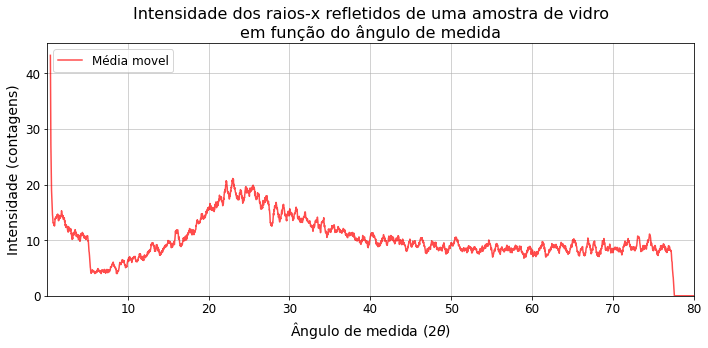

In [21]:
for i in range(amostras):
#     moving_average(df[i], 50)
    plot_spectro(df[i], 'red', nomes[i], (df[i]['angulo'].iloc[0], df[i]['angulo'].iloc[-1]), 0, window_size = 20)